In [237]:
#Log
#2022-03-03: Looked into abundances normalized by Fe, this did not seem to improve anything.
#2022-10-03: Without changing the model, Teff and vsini were poorly predicted

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 130)

# df = pd.read_csv("/content/drive/My Drive/data/trevor/lvm-test-data.csv")
# df = df.drop(columns=['bf18_[N/H]','p20_cks_steff'])
# df.head()

# df_err = pd.read_csv("/content/drive/My Drive/data/trevor/lvm-test-errors.csv")
# df_err = df_err.drop(columns=['bf18_e_[N/H]','p20_cks_steff_err1'])
# df_err.head()

# Plot style

In [238]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 150

import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

In [239]:
#data = pd.read_parquet("../data/data.parquet")

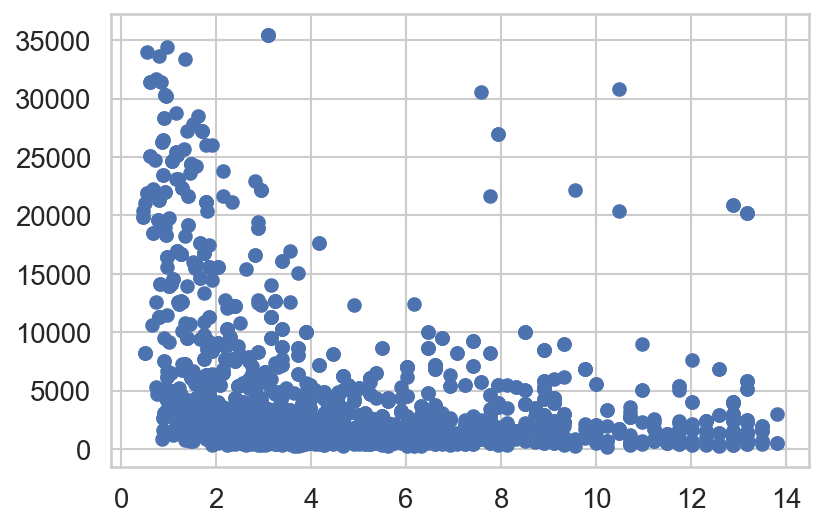

In [240]:
plt.scatter(data['cks_age'], data['l20_Rvar'])
plt.show()

# Load data table, perform merges, and select features 

In [345]:
df = pd.read_parquet("../data/data.parquet")

#Compute absolute G-magnitudes from Bailer-Jones distance estimates
df['MG'] = df['gaia_phot_g_mean_mag'] - 5 * (np.log10(df['gaia_r_est']) - 1)

#Assert errors of 0.1 mag for now
df['MG_err'] = 0.1*np.ones(len(df)) 
df['gaia_bp_rp_err'] = 0.1*np.ones(len(df))
df['bf18_e_[alpha/Fe]'] = 0.1*np.ones(len(df))
df['l20_e_Rvar'] = 100*np.ones(len(df))

#Santos et al. 2021
san = pd.read_csv("../data/S21_rotators.csv")
san = san.add_prefix('san_')

df = df.merge(san, how='left', left_on='kepid', right_on='san_KIC')
df = df.drop_duplicates(subset=['kepid'], keep='first')

print(len(df), 'stars after dropping duplicates')

#df['m13_Prot']
#df['m13_e_Prot']
#df['m13_Rvar']
#df['bf18_logRHK']
#df['bf18_Age']
#df['bf18_Age_maxerr']
#df['cks_age']
#df['cks_age_maxerr']
#df['b18_EW(Li)']
#df['b18_e_EW(Li)']
#df['b18_A(Li)']
#df['b18_e_A(Li)']
#Rvar, kinematics

obs_cols = []
err_cols = []
all_cols = []


# Select all of the Brewer & Fischer 2018 abundances (normalized to hydrogen)
# Exclude [M/H] (which is dependent on other abundances) and [N/H] (which is not reliably measured)

for col in df.columns:
    if ("bf18_[" in col) & ("/H]" in col) & (col!="bf18_[M/H]") & (col!="bf18_[N/H]"):
        obs_cols.append(col)
        all_cols.append(col)
    
    if ("bf18_e_[" in col) & ("/H]" in col) & (col!="bf18_e_[M/H]") & (col!="bf18_e_[N/H]"):
        err_cols.append(col)
        all_cols.append(col)

#Note. Including bf18_vsini led to high variance in the validation set (overfitting?).      
for col in ["p20_cks_slogg",
            "b18_A(Li)",
            "cks_age"]:

            obs_cols.append(col)
            all_cols.append(col)

            
# Right now the error columns are not being used.
# Note there are no errors for Rvar
for col in ["p20_cks_slogg_err1",
            "b18_e_A(Li)",
            "cks_age_maxerr"]:

            err_cols.append(col)
            all_cols.append(col)

print(len(obs_cols))
print(len(err_cols))
print(len(all_cols))
print(all_cols)



#Drop NaNs
df = df.dropna(subset=all_cols) 
#df = df.dropna(subset="cks_age")
df_err = df[err_cols]
df = df[obs_cols]

print(len(df), 'stars in final data table')

8214 stars after dropping duplicates
17
17
34
['bf18_[C/H]', 'bf18_[O/H]', 'bf18_[Na/H]', 'bf18_[Mg/H]', 'bf18_[Al/H]', 'bf18_[Si/H]', 'bf18_[Ca/H]', 'bf18_[Ti/H]', 'bf18_[V/H]', 'bf18_[Cr/H]', 'bf18_[Mn/H]', 'bf18_[Fe/H]', 'bf18_[Ni/H]', 'bf18_[Y/H]', 'bf18_e_[C/H]', 'bf18_e_[O/H]', 'bf18_e_[Na/H]', 'bf18_e_[Mg/H]', 'bf18_e_[Al/H]', 'bf18_e_[Si/H]', 'bf18_e_[Ca/H]', 'bf18_e_[Ti/H]', 'bf18_e_[V/H]', 'bf18_e_[Cr/H]', 'bf18_e_[Mn/H]', 'bf18_e_[Fe/H]', 'bf18_e_[Ni/H]', 'bf18_e_[Y/H]', 'p20_cks_slogg', 'b18_A(Li)', 'cks_age', 'p20_cks_slogg_err1', 'b18_e_A(Li)', 'cks_age_maxerr']
447 stars in final data table


# Impute missing values with mean

In [346]:
# for col in obs_cols:
#     df[col].fillna(df[col].mean(), inplace = True)
    
# for col in err_cols:
#     df_err[col].fillna(df_err[col].mean(), inplace = True)    
    
# df.head(50)

In [347]:
#from sklearn.impute import SimpleImputer

#imp = SimpleImputer(missing_values=np.nan, strategy='mean')

#df = print(imp.fit_transform(df))
#df = imp.fit_transform(df)

## Check that there are no NaNs, missing values, or else perform imputation

In [348]:
df.isna().sum()

bf18_[C/H]       0
bf18_[O/H]       0
bf18_[Na/H]      0
bf18_[Mg/H]      0
bf18_[Al/H]      0
bf18_[Si/H]      0
bf18_[Ca/H]      0
bf18_[Ti/H]      0
bf18_[V/H]       0
bf18_[Cr/H]      0
bf18_[Mn/H]      0
bf18_[Fe/H]      0
bf18_[Ni/H]      0
bf18_[Y/H]       0
p20_cks_slogg    0
b18_A(Li)        0
cks_age          0
dtype: int64

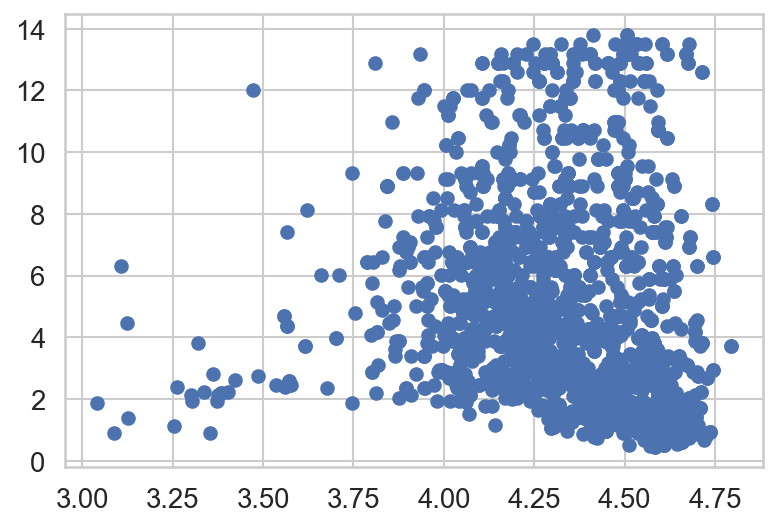

In [349]:
plt.scatter(data['p20_cks_slogg'],
            data['cks_age'])

## We have to guard against data leakage. Because each star is represented more than once (since a star can host more than one planet) we must double-check that there are no duplicates so that a star doesn't end up in both the training and validation sets. 

In [350]:
df.describe()

,bf18_[C/H],bf18_[O/H],bf18_[Na/H],bf18_[Mg/H],bf18_[Al/H],bf18_[Si/H],bf18_[Ca/H],bf18_[Ti/H],bf18_[V/H],bf18_[Cr/H],bf18_[Mn/H],bf18_[Fe/H],bf18_[Ni/H],bf18_[Y/H],p20_cks_slogg,b18_A(Li),cks_age
count,447.000000,447.000000,447.000000,447.00000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,-0.018658,0.077651,-0.037114,-0.01123,-0.047584,0.001566,0.045391,0.050917,-0.003669,0.018054,-0.086398,0.023289,-0.020447,0.036085,4.232519,2.197696,5.018004
std,0.127577,0.144474,0.196369,0.13897,0.204985,0.147238,0.152698,0.132285,0.176170,0.165116,0.243956,0.161529,0.181739,0.197771,0.231538,0.395630,2.890154
min,-0.390000,-0.300000,-0.580000,-0.42000,-0.920000,-0.390000,-0.420000,-0.340000,-1.240000,-0.520000,-0.900000,-0.510000,-0.520000,-0.620000,3.041000,0.520000,0.457088
25%,-0.090000,-0.020000,-0.150000,-0.10000,-0.160000,-0.090000,-0.030000,-0.030000,-0.100000,-0.065000,-0.230000,-0.060000,-0.125000,-0.060000,4.108500,1.980000,2.754229
50%,-0.020000,0.070000,-0.060000,-0.02000,-0.050000,0.000000,0.050000,0.040000,0.010000,0.030000,-0.080000,0.030000,-0.030000,0.060000,4.253000,2.270000,4.677351
75%,0.060000,0.160000,0.085000,0.07000,0.070000,0.100000,0.145000,0.140000,0.120000,0.130000,0.070000,0.130000,0.090000,0.160000,4.363000,2.480000,6.683882
max,0.510000,0.830000,0.550000,0.36000,0.950000,0.500000,0.460000,0.460000,0.490000,0.410000,0.550000,0.450000,0.560000,0.710000,4.720000,3.110000,13.489629


# Outlier pruning (check if this step is necessary)

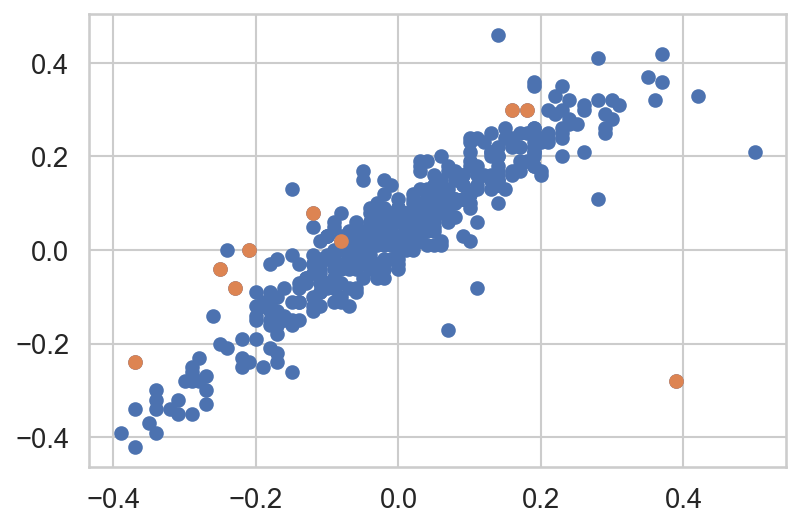

In [351]:
#%debug 
cols = df.columns
outliers = np.zeros(len(df), dtype=bool)

sigma_thresh = 4

for col in df.columns:
    outliers += abs(df[col] - np.mean(df[col])) / np.std(df[col]) > sigma_thresh

df_arr = np.array(df)

plt.scatter(df_arr[:,5], df_arr[:,6])
plt.scatter(df_arr[:,5][outliers], df_arr[:,6][outliers]);

# Prepare the data

In [352]:
Y = np.array(df[~outliers])
err = np.array(df_err[~outliers])

# Zero mean and normalize data (and errors) in each column
emp_mu = np.mean(Y, axis=0)
emp_sigma = np.std(Y, axis=0)
Y = (Y - emp_mu[None]) / emp_sigma[None]
err = err / emp_sigma[None]

# The weights are just the inverse variances
weights = 1.0 / err ** 2

# Zero out 10% of the weights as a validation
validate_mask = np.random.default_rng(567).uniform(0, 1, weights.shape) < 0.2
weights[validate_mask] = 0.0

print(Y.shape)

(438, 17)


# What should the dimension of the latent space be? 

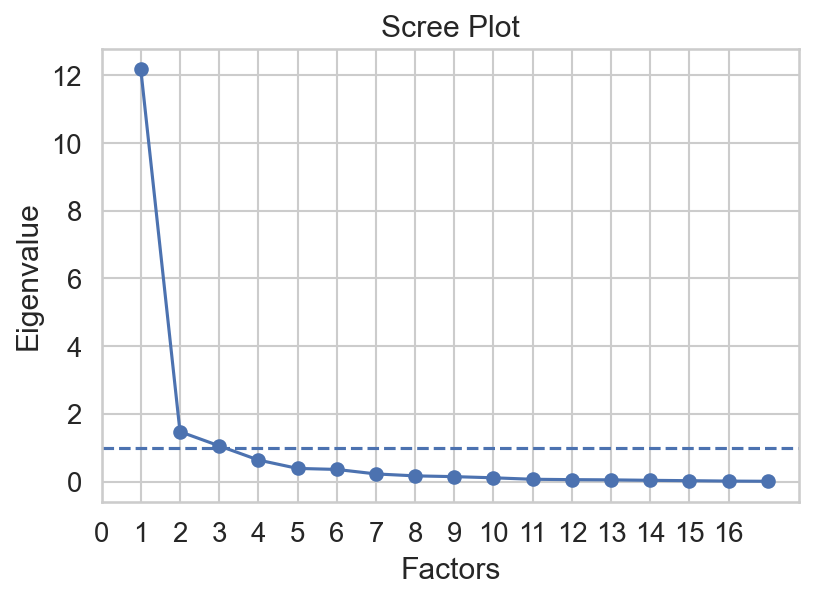

In [353]:
from factor_analyzer import FactorAnalyzer

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(Y)
eigen_values, vectors = fa.get_eigenvalues()

plt.plot(range(1,Y.shape[1]+1), eigen_values, 'o-')
plt.xticks(range(Y.shape[1]))
plt.title('Scree Plot')
plt.axhline(1, ls='--')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue');

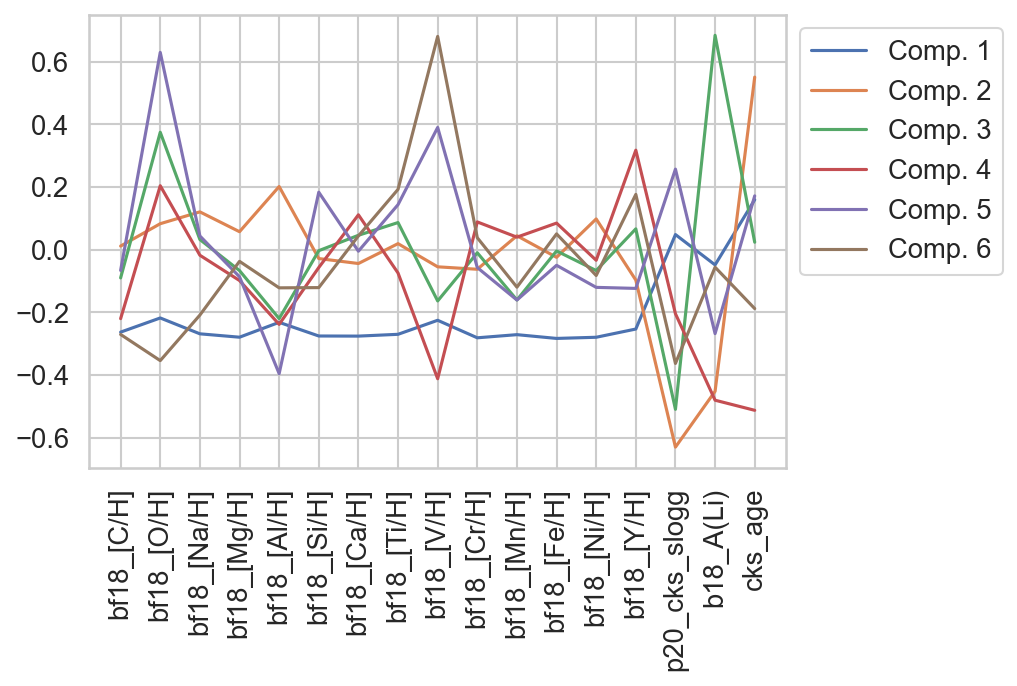

In [365]:
from sklearn.decomposition import FactorAnalysis,PCA

latent_dim = 6

pca = PCA(latent_dim).fit(Y)

for i in range(pca.n_components):
    plt.plot(pca.components_[i], label="Comp. "+f"{i+1}")
    
plt.xticks(np.arange(np.shape(Y)[1]), df.columns, rotation=90)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Factor Analysis

In [366]:
#Can also do factor analysis
print(np.shape(pca.components_))
fa = FactorAnalysis(latent_dim, rotation="varimax").fit(Y)
print(np.shape(fa.components_))

(6, 17)
(6, 17)


/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_64133/2894209000.py:26: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_64133/2894209000.py:26: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_64133/2894209000.py:26: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


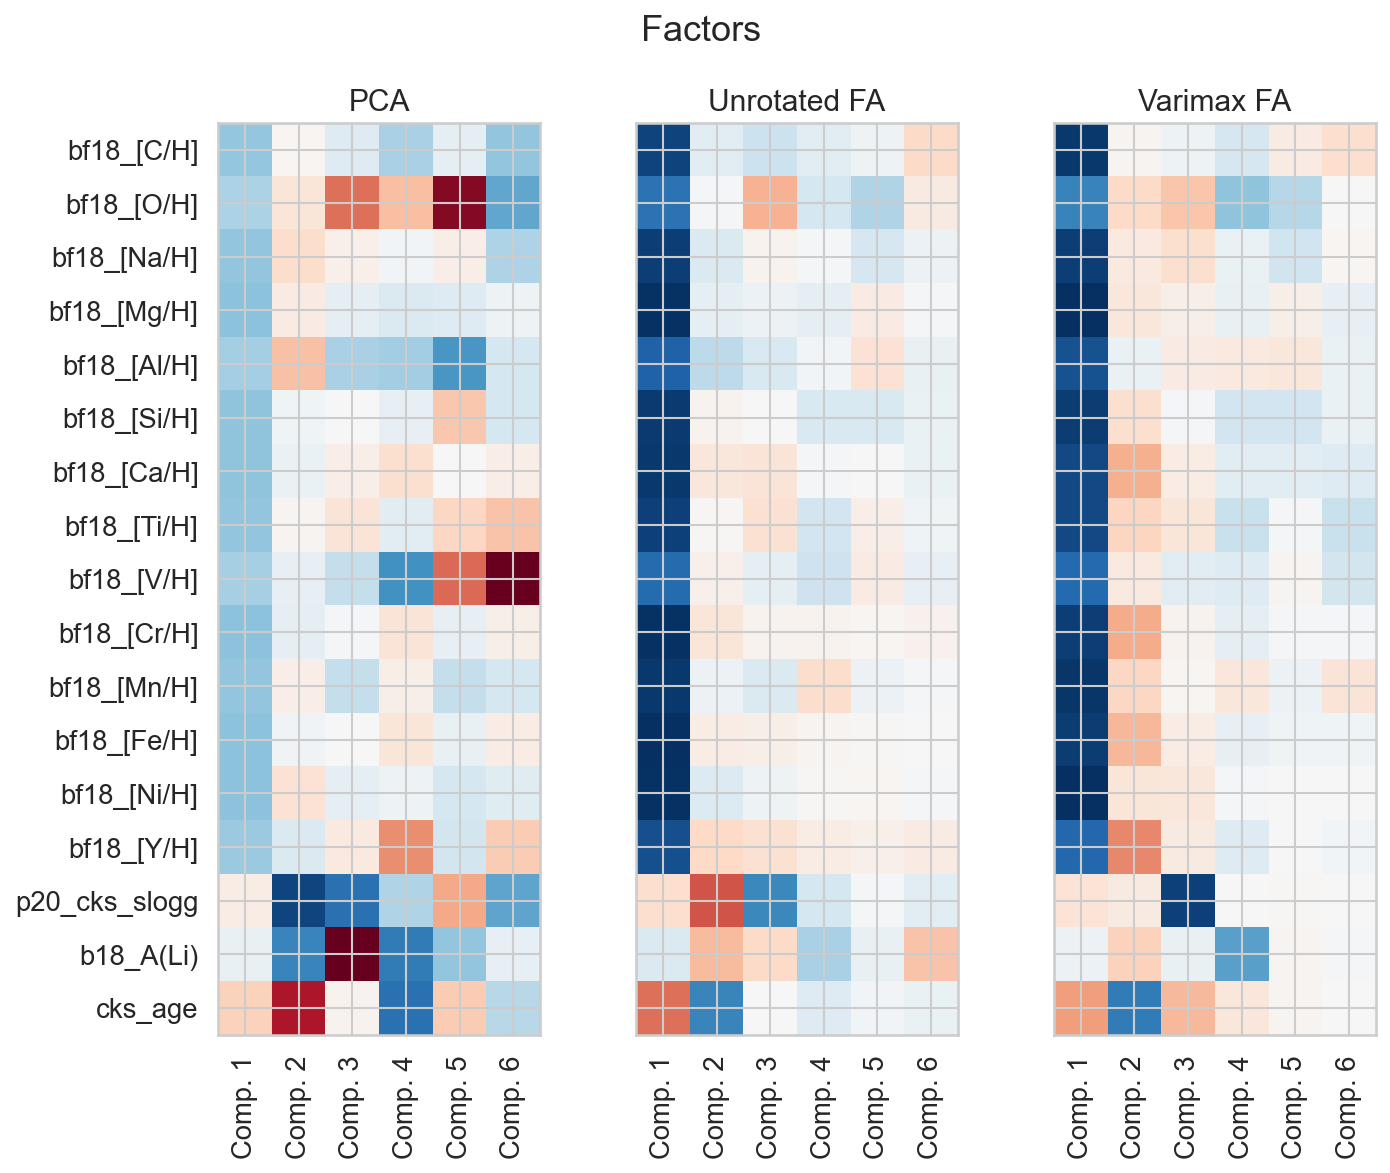

In [367]:
n_comps = 6

#feature_names = list(data.columns)
feature_names = list(df.columns)

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]

fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(Y)
    
    components = fa.components_.T
    #print("\n\n %s :\n" % method)
    #print(np.shape(components))
    #print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks(np.arange(n_comps))    
    ax.set_xticklabels(["Comp. "+str(i+1) for i in range(n_comps)], rotation=90)

fig.suptitle("Factors")
plt.tight_layout();

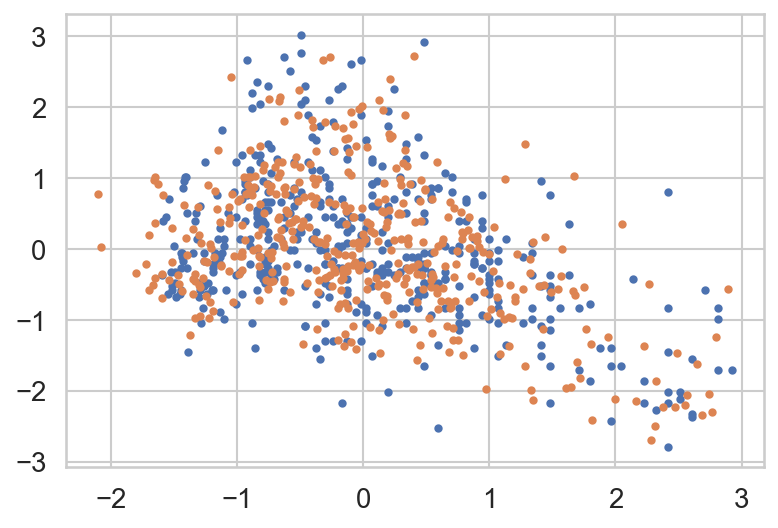

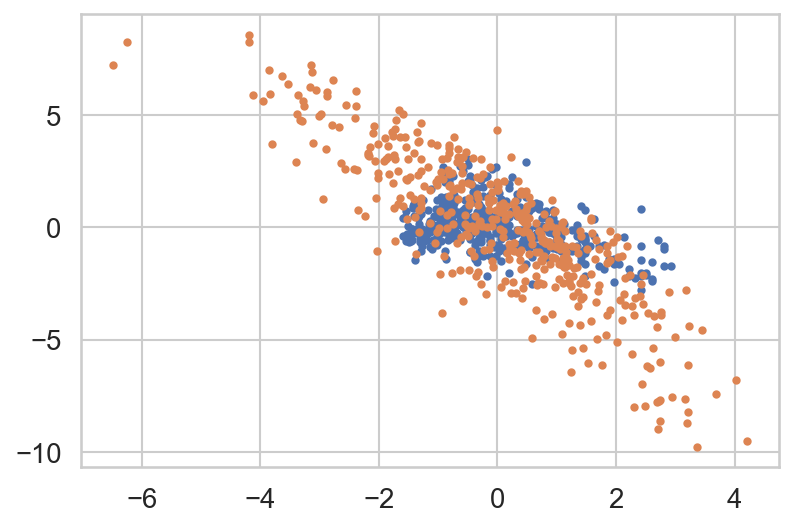

In [368]:
Y_mod = pca.transform(Y) @ pca.components_
plt.plot(Y[:, -1], Y[:, 2], ".")
plt.plot(Y_mod[:, -1], Y_mod[:, 2], ".")
plt.show()

Y_mod = pca.transform(Y) @ fa.components_
plt.plot(Y[:, -1], Y[:, 2], ".")
plt.plot(Y_mod[:, -1], Y_mod[:, 2], ".")
plt.show()

# The model (PCA...at the moment)

In [369]:
import jax
import jax.numpy as jnp

jax.config.update("jax_enable_x64", True)

def model(params):
    return params["mean"][None] + params["U"] @ params["V"]

def loss(params, lam=1e-8):
    nll = 0.5 * jnp.sum(jnp.square(Y - model(params)) * weights)
    reg = 0.5 * lam * jnp.sum(jnp.square(params["mean"]))
    reg += 0.5 * lam * jnp.sum(jnp.square(params["U"]))
    reg += 0.5 * lam * jnp.sum(jnp.square(params["V"]))
    return nll + reg

loss_grad_fn = jax.jit(jax.value_and_grad(loss))

params = {
    "mean": jnp.zeros(Y.shape[1]),
    "U": jnp.asarray(pca.transform(Y)),
    "V": jnp.asarray(pca.components_),
}

# params = {
#     "mean": jnp.zeros(Y.shape[1]),
#     "U": jnp.asarray(fa.transform(Y)),
#     "V": jnp.asarray(fa.components_),
# }

loss(params)

DeviceArray(5901.40510522, dtype=float64)

# Training

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 11730.89it/s]


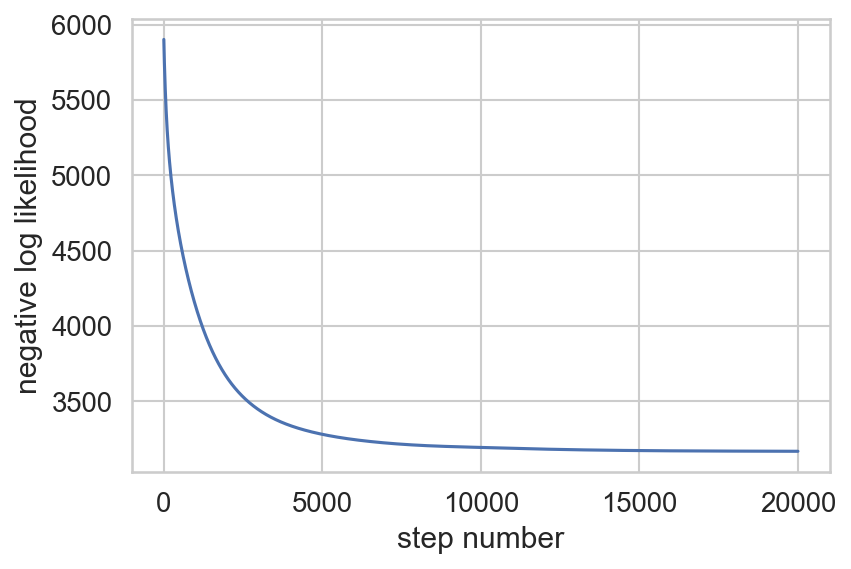

In [370]:
import optax
from tqdm import trange

learning_rate = 3e-4

tx = optax.adam(learning_rate=learning_rate)
opt_state = tx.init(params)

@jax.jit
def step(params, opt_state):
    loss_val, grads = loss_grad_fn(params)
    updates, opt_state = tx.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    return loss_val, params, opt_state

losses = []
for i in trange(20_000):
    loss_val, params, opt_state = step(params, opt_state)
    losses.append(loss_val)

plt.plot(losses)
plt.ylabel("negative log likelihood")
_ = plt.xlabel("step number")

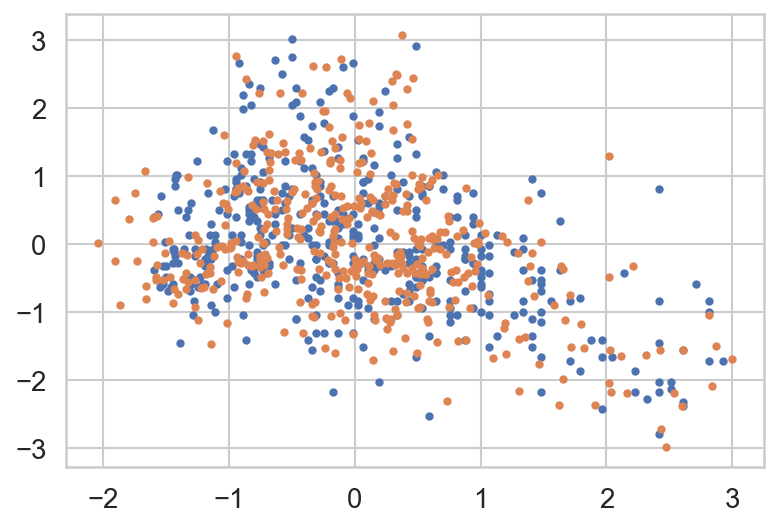

In [371]:
Y_mod = model(params)
plt.plot(Y[:, -1], Y[:, 2], ".")
plt.plot(Y_mod[:, -1], Y_mod[:, 2], ".")

# What do the measurements look like as a function of the first latent dimension?

Text(0.5, 0, 'latent dim 0')

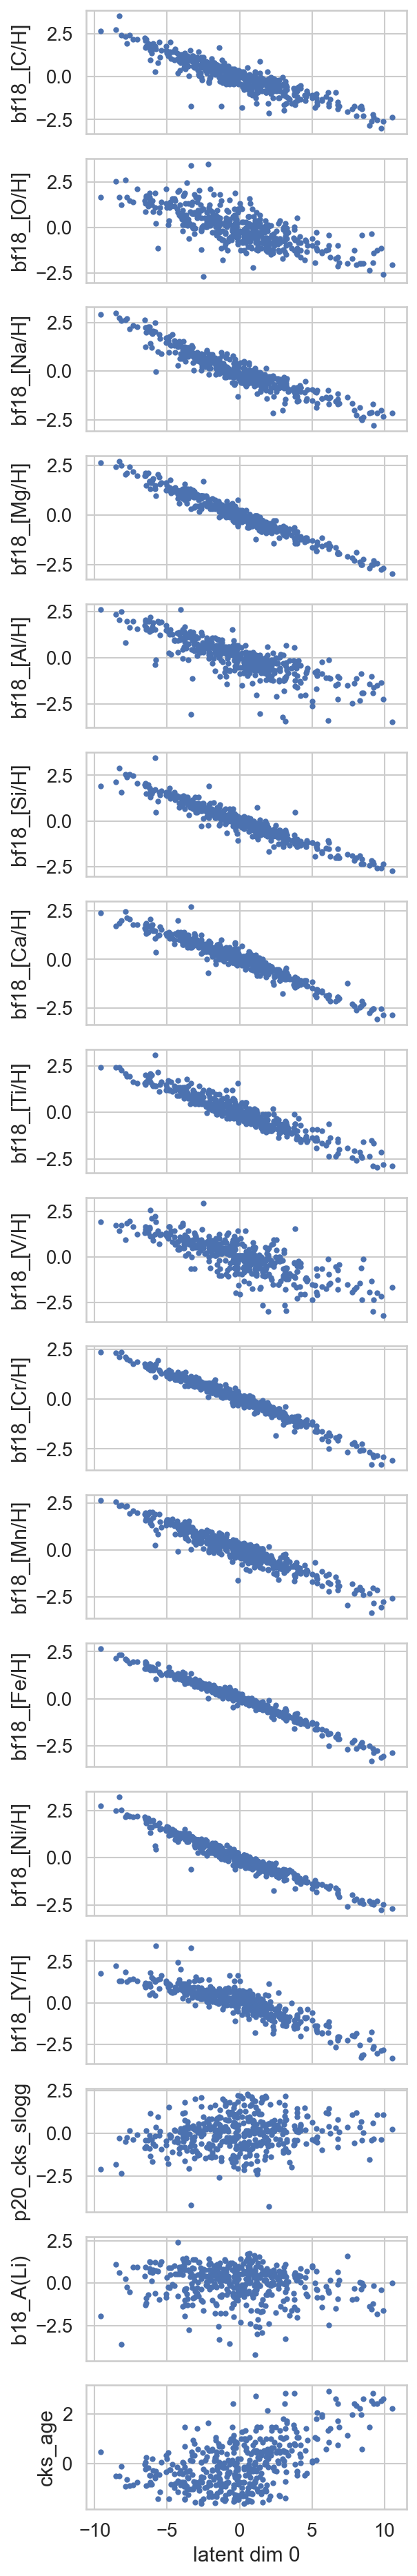

In [372]:
# What do the measurements look like as a function of the first latent dimension
fig, axes = plt.subplots(Y.shape[1], sharex=True, figsize=(4, 32))
#fig, axes = plt.subplots(Y.shape[1],  ncols=2, figsize=(5, 20))

# loop through tickers and axes
#for ticker, ax in zip(tickers, axs.ravel()):

for n, ax in enumerate(axes):
    ax.plot(params["U"][:, 0], Y[:, n], ".")
    ax.set_ylabel(df.columns[n])

# for n, ax in zip(np.arange(Y.shape[1]), axes.ravel()):
#     ax.plot(params["U"][:, 0], Y[:, n], ".")
#     ax.set_ylabel(df.columns[n])

axes[-1].set_xlabel("latent dim 0")

# How well does the model perform on held out data?

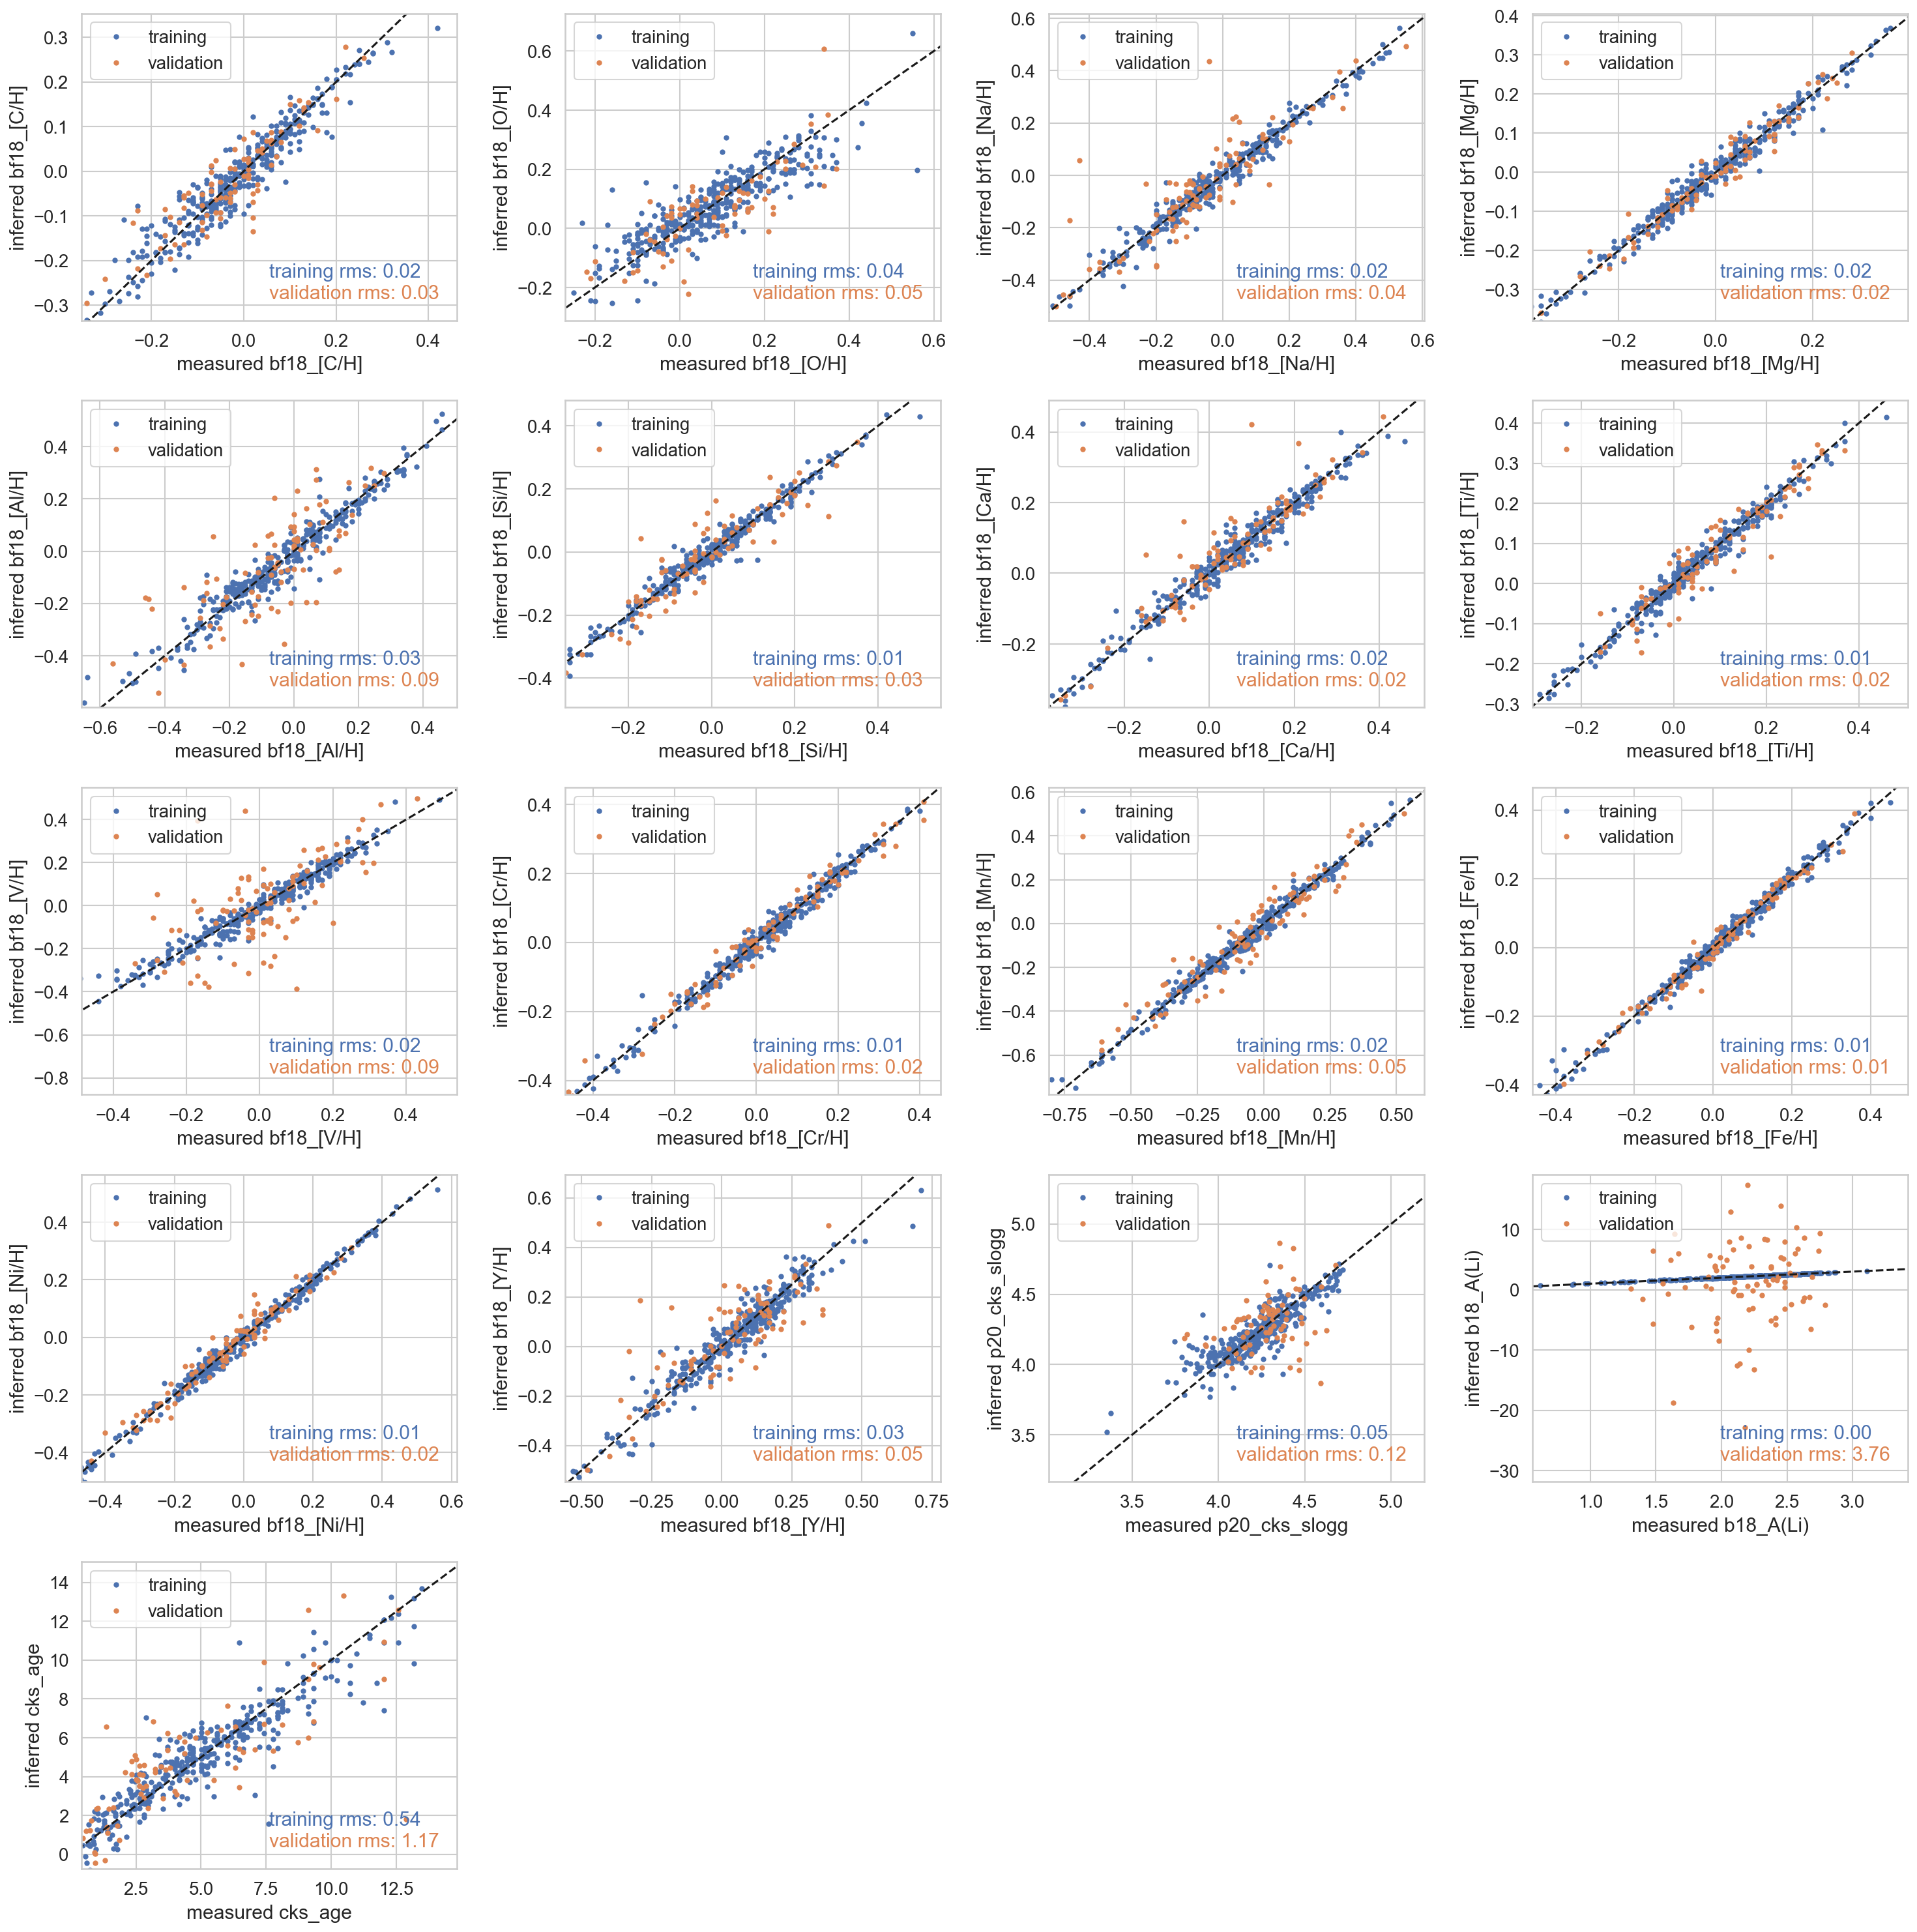

In [373]:
# What about the held out data
Y_mod = model(params)

plt.figure(figsize=(20,20))
#plt.subplots_adjust(hspace=0.5)

# loop through the length of tickers and keep track of index
# for n, ticker in enumerate(tickers):
#     # add a new subplot iteratively
#     ax = plt.subplot(3, 2, n + 1)

for i in range(np.shape(Y)[1]):
    
    ax = plt.subplot(5, 4, i+1)
    
    m = validate_mask[:, i]
    
    _x = Y[:, i]*emp_sigma[i] + emp_mu[i]  
    _y = Y_mod[:, i]*emp_sigma[i] + emp_mu[i]
    
    # plt.plot(Y_mod[m, i]*emp_sigma[i] + emp_mu[i], 
    #         Y[m, i]*emp_sigma[i] + emp_mu[i], ".", label="validation")  

    plt.plot(_x[~m], _y[~m], ".", label="training")
    plt.plot(_x[m], _y[m], ".", label="validation")  

    train_rms = np.sqrt(np.median((_x[~m]-_y[~m])**2))
    valid_rms = np.sqrt(np.median((_x[m]-_y[m])**2))

    plt.text(0.5, 0.14, 'training rms: '+"{:.2f}".format(train_rms), transform=ax.transAxes, color='C0')
    plt.text(0.5, 0.07, 'validation rms: '+"{:.2f}".format(valid_rms), transform=ax.transAxes, color='C1')

    xmin,xmax = 0.9*np.min(_x), 1.1*np.max(_x)
    ymin,ymax = 0.9*np.min(_y), 1.1*np.max(_y)

    plt.plot([-100,100],[-100,100], 'k--')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)

    plt.legend(loc='upper left')
    plt.xlabel(f"measured {df.columns[i]}")
    plt.ylabel(f"inferred {df.columns[i]}")

plt.tight_layout();

### Some background information on nucleosynthesis and galactic chemical evolution

In [117]:
# Carbon (C): dying low-mass stars, some from exploding massive stars, alpha-element / AGB
# Yttrium (Y): dying low-mass stars, some from exploding massive stars, spallation, light element primary production

# Oxygen (O): exploding massive stars, alpha element
# Sodium (Na): exploding massive stars, 
# Magnesium (Mg): exploding massive stars, alpha element
# Aluminum (Al): exploding massive stars, 
# Silicon (Si): exploding massive stars, some from exploding white dwarfs

# Calcium (Ca): ~half from exploding massive stars, ~half from exploding white dwarfs, alpha-element
# Titanium (Ti): exploding white dwarfs, some from exploding massive stars, alpha-element

# Vanadium (V): exploding white dwarfs, some from exploding massive stars, iron peak
# Chromium (Cr): exploding white dwarfs, some from exploding massive stars, iron peak
# Manganese (Mn): exploding white dwarfs, some from exploding massive stars, iron peak
# Iron (Fe): exploding white dwarfs, some from exploding massive stars, iron peak
# Nickel (Ni): exploding white dwarfs, some from exploding massive stars, iron peak 

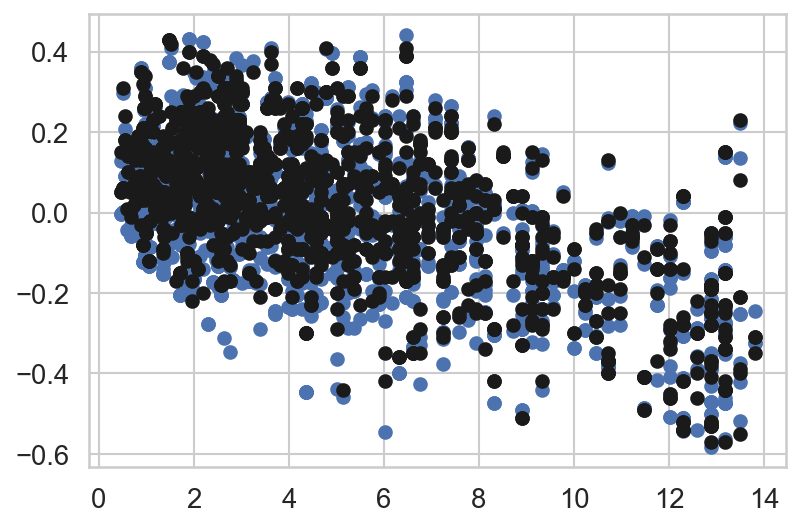

In [123]:
iron_peak = ['V','Cr','Mn','Fe','Ni']

fe_peak_sum = data['bf18_[V/H]'] + data['bf18_[Cr/H]'] + data['bf18_[Mn/H]'] + data['bf18_[Fe/H]'] + data['bf18_[Ni/H]']
fe_peak_avg = np.mean([data['bf18_[V/H]'], data['bf18_[Cr/H]'], data['bf18_[Mn/H]'], data['bf18_[Fe/H]'], data['bf18_[Ni/H]']], axis=0)

plt.scatter(data['cks_age'],
            fe_peak_avg)


# plt.scatter(data['cks_age'],
#             data['bf18_[V/H]'])
# plt.show()

plt.scatter(data['cks_age'],
            data['bf18_[Cr/H]'], color='k')
plt.show()

# plt.scatter(data['cks_age'],
#             data['bf18_[Cr/H]']+data['bf18_[V/H]']+
#            )
# plt.show()

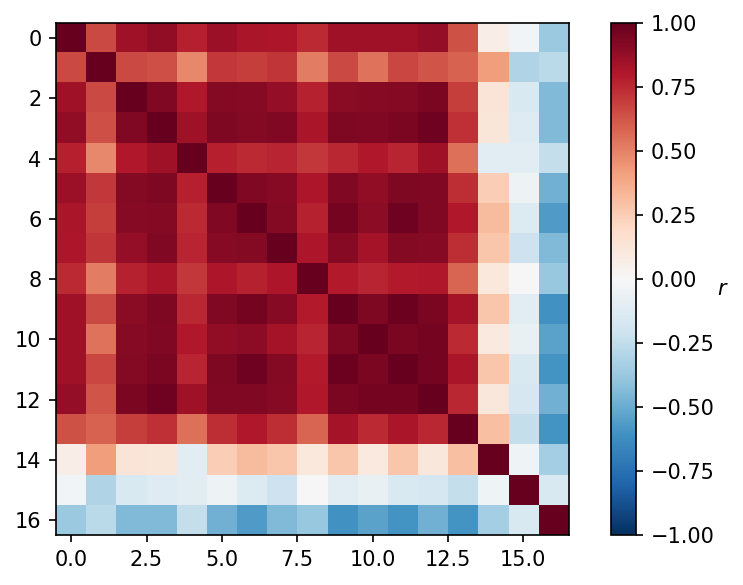

In [19]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(Y.T), cmap="RdBu_r", vmin=-1, vmax=1)

#ax.set_xticks([0, 1, 2, 3])
#ax.set_xticklabels(list(feature_names), rotation=90)
#ax.set_yticks([0, 1, 2, 3])
#ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
plt.tight_layout()

In [25]:
data = pd.read_parquet("../data/data.parquet")

from scipy.stats import pearsonr

for col in data.columns:
    
    try:
        _ = (np.isfinite(data[col])) & (np.isfinite(data['cks_age']))
        corr, _ = pearsonr(data[col][_], data['cks_age'][_])
        if abs(corr)>0.3:
            print(col, corr)
    except:
        pass

/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


b20_iso_logg_err1 0.43355925927342953
b20_iso_feh -0.3249493957296897
b20_iso_feh_err1 0.33382774840530893
b20_iso_age 0.5204821405776299
b20_log10_iso_age 0.48848575105071
b20_E_log10_iso_age -0.4495100505138061
b20_e_log10_iso_age -0.3824706640968718
b18_[Fe/H] -0.5439393698508002
b18_tb2_EW(Li) -0.3158853691195089
cks_[Fe/H] -0.5439393698508002
cks_logAiso 0.9312763675300789
cks_E_logAiso -0.6440194956167453
cks_e_logAiso -0.5529404457637909
p20_koi_smet -0.345516041642758
p20_cks_smet -0.5448135750727323
p20_iso_smet -0.541719912936482
p20_iso_sage 0.5528090438455031
p20_iso_slogage 0.5396550811063843
p20_iso_slogage_err1 -0.34807175151502606
p20_iso_slogage_err2 0.3208582189704534
p20_giso_sage 0.9999309737770947
p20_giso_slogage 0.9310779648932734
p20_giso_slogage_err1 -0.6459261199293713
p20_giso_slogage_err2 0.5542553314391
p20_v18_smet -0.5771205537304402
p20_v18_smass -0.752867159776123
p20_v18_srad -0.39858488638000605
p20_v18_srho 0.3080979383254494
p20_v18_rovera_err1 -0.3

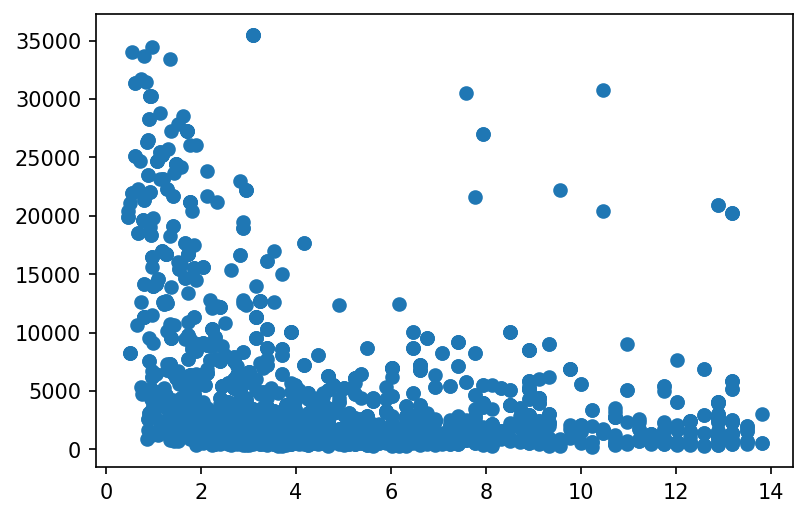

In [29]:
plt.scatter(data['cks_age'], 
            data['l20_Rvar'])
plt.show()

Text(0, 0.5, 'petigura 2020 age gyr')

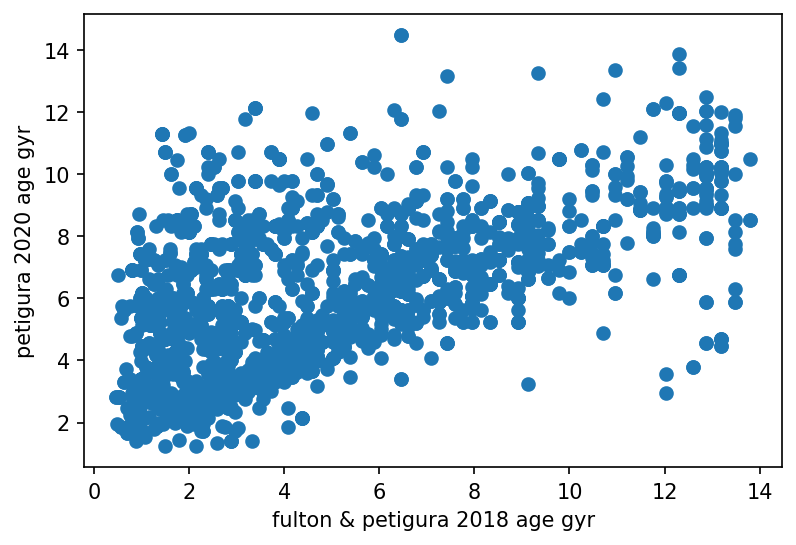

In [31]:
plt.scatter(data['cks_age'], 
            data['p20_iso_sage'])
plt.xlabel('fulton & petigura 2018 age gyr')
plt.ylabel('petigura 2020 age gyr')

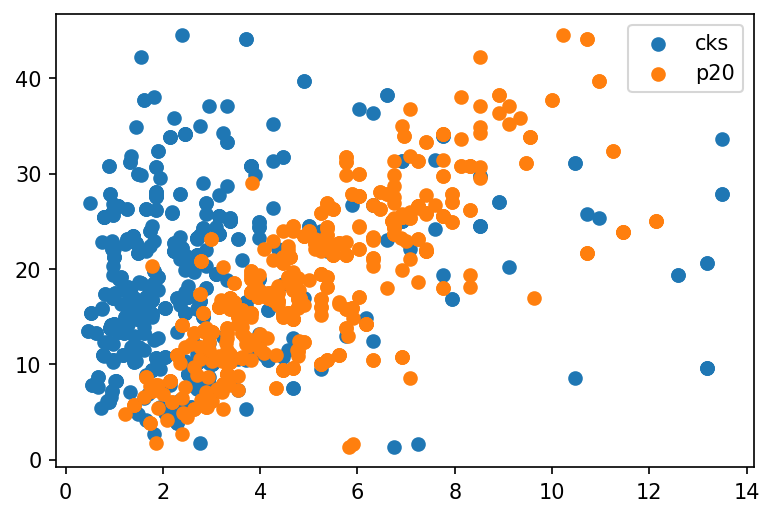

In [33]:
plt.scatter(data['cks_age'], 
            data['m13_Prot'], label='cks')

plt.scatter(data['p20_iso_sage'], 
            data['m13_Prot'], label='p20')

plt.legend()

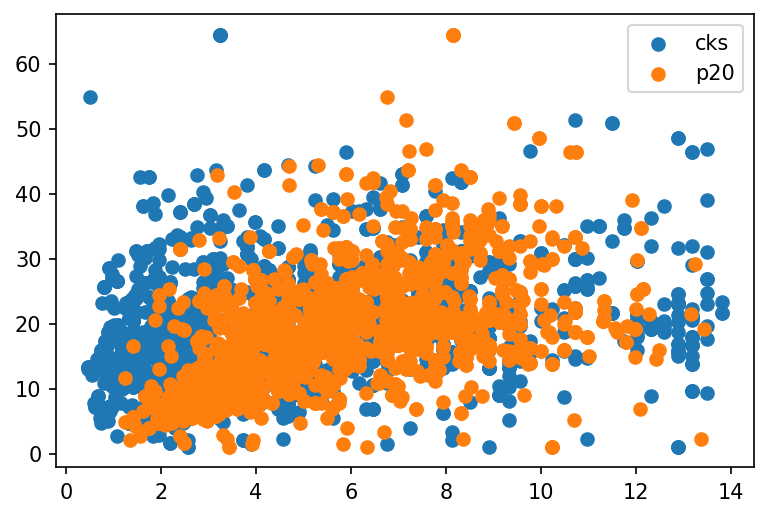

In [34]:
plt.scatter(data['cks_age'], data['a18_period'], label='cks')
plt.scatter(data['p20_iso_sage'], data['a18_period'], label='p20')
plt.legend()

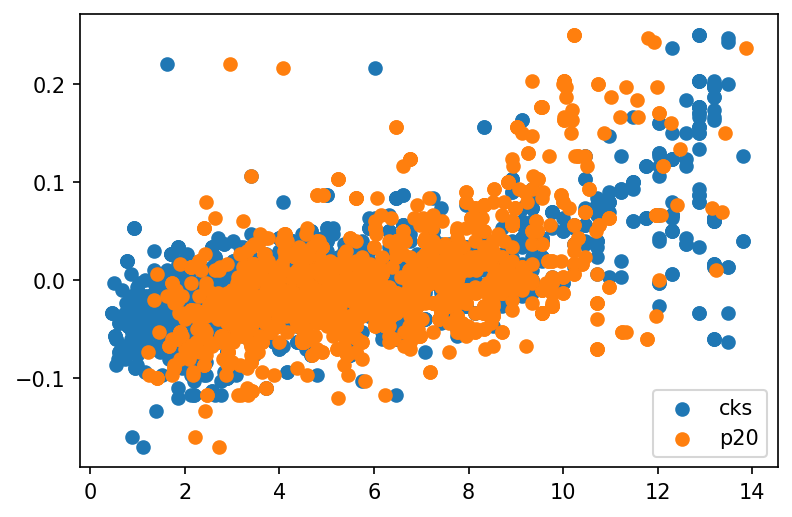

In [35]:
plt.scatter(data['cks_age'], data['bf18_[alpha/Fe]'], label='cks')
plt.scatter(data['p20_iso_sage'], data['bf18_[alpha/Fe]'], label='p20')
plt.legend()

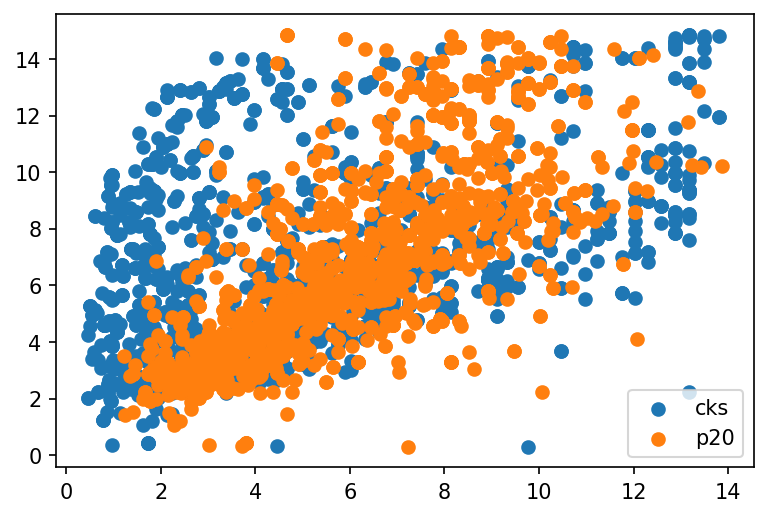

In [36]:
plt.scatter(data['cks_age'], data['bf18_Age'], label='cks')
plt.scatter(data['p20_iso_sage'], data['bf18_Age'], label='p20')
plt.legend()